In [1]:
#exemplo apostila página 228
from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np


F, a, b, R, mttf, l , p,sigma_p, mi_p, q =symbols('F a b R mttf l p sigma_p mi_p q')

u=0.001
s=0.0005
t=1500
PrEO = 10*(1-exp(-l*t))*(exp(-l*t))**9 #Pr(E | Theta)

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
pprint(PrEO)
p_i = np.linspace(0.000005,0.001,10000)

⎛         -1500⋅l⎞  -13500⋅l
⎝10 - 10⋅ℯ       ⎠⋅ℯ        


In [3]:
FO=Normal('FO', u,s)

In [4]:
N(density(FO)(0.001))
PrxF=PrEO*density(FO)(l)

In [5]:


numerical_integration=0
guardando=[]
temp_antigo=N(PrxF.subs(l,p_i[0]))                                    
guardando.append(temp_antigo)
for i in range(1,len(p_i)):
    temp= N(PrxF.subs(l,p_i[i]))
    guardando.append(temp)
    numerical_integration = numerical_integration+(temp_antigo+temp)*(p_i[i]-p_i[i-1])/2
    temp_antigo=temp
print('denominador ='+str(numerical_integration))
print('ou '+str(1/numerical_integration))

denominador =0.0139635934861335
ou 71.6148032376512


In [6]:
numerador=np.array(guardando)

In [7]:
pontos = np.divide(numerador,numerical_integration)

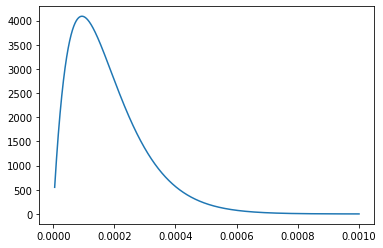

In [8]:
plt.plot(p_i,pontos)

In [9]:
numerical_integration2=0
guardando2=[]
temp_antigo=pontos[0]                                    
for i in range(1,len(p_i)):
    temp= pontos[i] 
    numerical_integration2 = numerical_integration2+(temp_antigo+temp)*(p_i[i]-p_i[i-1])/2
    guardando2.append((temp_antigo+temp)*(p_i[i]-p_i[i-1])/2)
    temp_antigo=temp
print('integral numérica ='+str(numerical_integration2))
    

integral numérica =1.00000000000000


In [10]:
guardando2.append(0)
cumsum = np.cumsum(guardando2)

In [11]:
P05 = (np.abs(cumsum - 0.05)).argmin()
p_i[P05]

In [12]:
P50=  (np.abs(cumsum - 0.5)).argmin()
p_i[P50]

In [13]:
P95= (np.abs(cumsum - 0.95)).argmin()
p_i[P95]

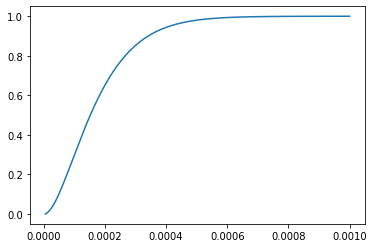

In [14]:
plt.plot(p_i,cumsum)


In [15]:
pontos[9999]